# Study of the reliability of borrowers


## Description of the project

The customer is the credit department of the bank. It is necessary to find out whether the marital status and the number of children of the client affect the fact of repaying the loan on time. Input data from the bank - statistics on the solvency of customers.

The results of the study will be taken into account when building a credit scoring model - a special system that assesses the ability of a potential borrower to return a loan to a bank.

### Description of data
* `children` - the number of children in the family
* `days_employed` - total work experience in days
* `dob_years` — client's age in years
* `education` - the level of education of the client
* `education_id` — education level identifier
* `family_status` - marital status
* `family_status_id` - marital status identifier
* `gender` — gender of the client
* `income_type` - employment type
* `debt` - whether he had a debt to repay loans
* `total_income` - monthly income
* `purpose` - the purpose of the loan

### Work plan

We will carry out the work in two stages.
At the first stage, we will evaluate the dataset, check it for missing values and duplicates, and process anomalous values, if any.
Next, let's see if we need any changes in the data, additional categories or aggregates.
At the second stage, we will try to answer the research questions:
- Is there a relationship between the number of children and loan repayment on time?
- Is there a relationship between marital status and loan repayment on time?
- Is there a relationship between the level of income and repayment of the loan on time?
- How do different purposes of the loan affect its repayment on time?

## Open the table and examine the general information about the data

**Import the pandas library. Read the data from the csv file into a dataframe and store it in the `data` variable.**

In [46]:
import pandas as pd

try:
    data = pd.read_csv('../datasets/data.csv')
except:
    print('No data to load')

**Display the first 20 lines of the `data` dataframe on the screen.**

In [47]:
data.head(20)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


**Display basic dataframe information using the `info()` method.**

In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


## Data preprocessing

### Remove missing values

**Print the number of missing values for each column. Use a combination of the two methods.**

In [49]:
data.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

**There are missing values in two columns. One of them is `days_employed`. The gaps in this column will be dealt with in the next step. Another column with missing values, `total_income`, stores income data. The amount of income is most affected by the type of employment, so we'll fill in the gaps in this column with the median value for each type from the `income_type` column. For example, for a person with an employment type of `employee`, the gap in the `total_income` column must be filled by the median income among all records with the same type.**

In [50]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['total_income'].isna()), 'total_income'] = \
    data.loc[(data['income_type'] == t), 'total_income'].median()

### Handling anomalous values

**Artifacts (anomalies) may occur in the data - values that do not reflect reality and appeared due to some kind of error. such an artifact would be the negative number of days of work experience in the `days_employed` column. For real data, this is normal. We'll process the values in this column: replace all negative values with positive ones using the `abs()` method.**

In [51]:
data['days_employed'] = data['days_employed'].abs()

**For each type of employment, print the median `days_employed` in days.**

In [52]:
data.groupby('income_type')['days_employed'].agg('median')

income_type
безработный        366413.652744
в декрете            3296.759962
госслужащий          2689.368353
компаньон            1547.382223
пенсионер          365213.306266
предприниматель       520.848083
сотрудник            1574.202821
студент               578.751554
Name: days_employed, dtype: float64

Two types (unemployed and pensioners) will get abnormally large values. Correcting such values is difficult, so we'll leave them as they are.

**List the unique values of the `children` column.**

In [53]:
data['children'].unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5])

**There are two abnormal values in the `children` column. Remove lines containing such anomalous values from the `data` dataframe.**

In [54]:
data = data[(data['children'] != -1) & (data['children'] != 20)]

**List the unique values of the `children` column again to make sure the artifacts have been removed.**

In [55]:
data['children'].unique()

array([1, 0, 3, 2, 4, 5])

### Removing missing values (continued)

**Fill in the gaps in the `days_employed` column with the median values for each `income_type` employment type.**

In [56]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['days_employed'].isna()), 'days_employed'] = \
    data.loc[(data['income_type'] == t), 'days_employed'].median()

**Make sure all gaps are filled. Test ourselves and print the number of missing values for each column again using two methods.**

In [57]:
data.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

### Changing data types

**Replace the data type in the `total_income` column with an integer using the `astype()` method.**

In [58]:
data['total_income'] = data['total_income'].astype(int)

### Handling duplicates

**Handle implicit duplicates in the `education` column. This column has the same values, but written differently: using uppercase and lowercase letters. Convert them to lowercase.**

In [59]:
data['education'] = data['education'].str.lower()

**Display the number of duplicate rows in the data. If such lines are present, remove them.**

In [60]:
data.duplicated().sum()

71

In [61]:
data = data.drop_duplicates()

### Data categorization

**Based on the ranges below, create a `total_income_category` column with categories in the `data` dataframe:**

- 0–30000 - `'E'`;
- 30001–50000 - ``D'`;
- 50001–200000 - ``C'`;
- 200001–1000000 - ``B'`;
- 1000001 and above - `'A'`.


**For example, a borrower with an income of 25,000 should be assigned an `'E'` category, and a customer with an income of 235,000 should be assigned a `'B'` category. Use function named `categorize_income()` and method `apply()`.**

In [62]:
def categorize_income(income):
    try:
        if 0 <= income <= 30000:
            return 'E'
        elif 30001 <= income <= 50000:
            return 'D'
        elif 50001 <= income <= 200000:
            return 'C'
        elif 200001 <= income <= 1000000:
            return 'B'
        elif income >= 1000001:
            return 'A'
    except:
        pass

In [63]:
data['total_income_category'] = data['total_income'].apply(categorize_income)

**Display a list of unique loan purposes from the `purpose` column.**

In [64]:
data['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

**Create a function that, based on the data from the `purpose` column, will form a new `purpose_category` column, which will include the following categories:**

- ``car operations'`,
- ``real estate transactions'`,
- ``conducting a wedding'`,
- ``getting an education'`.

**For example, if the `purpose` column contains the substring `'car purchase'`, then the `purpose_category` column should contain the string `'car operations'`.**

**Use your own function named `categorize_purpose()` and method `apply()`. Examine the data in the `purpose` column and determine which substrings will help you correctly identify the category.**

In [65]:
def categorize_purpose(row):
    try:
        if 'автом' in row:
            return 'операции с автомобилем'
        elif 'жил' in row or 'недвиж' in row:
            return 'операции с недвижимостью'
        elif 'свад' in row:
            return 'проведение свадьбы'
        elif 'образов' in row:
            return 'получение образования'
    except:
        return 'нет категории'

In [66]:
data['purpose_category'] = data['purpose'].apply(categorize_purpose)

### Step 3: Explore the data and answer the questions

In [67]:
# add matplotlib for plots
import matplotlib.pyplot as plt
plt.style.use('ggplot')


#### 3.1 Is there a relationship between the number of children and loan repayment on time?

##### Review

Let's look at the resulting data again to determine which part of the dataset we need for analysis.

In [68]:
# print the first 10 rows of the dataset
data.head(10)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,total_income_category,purpose_category
0,1,8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья,B,операции с недвижимостью
1,1,4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля,C,операции с автомобилем
2,0,5623.422610,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья,C,операции с недвижимостью
3,3,4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование,B,получение образования
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу,C,проведение свадьбы
5,0,926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763,покупка жилья,B,операции с недвижимостью
6,0,2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525,операции с жильем,B,операции с недвижимостью
7,0,152.779569,50,среднее,1,женат / замужем,0,M,сотрудник,0,135823,образование,C,получение образования
8,2,6929.865299,35,высшее,0,гражданский брак,1,F,сотрудник,0,95856,на проведение свадьбы,C,проведение свадьбы
9,0,2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425,покупка жилья для семьи,C,операции с недвижимостью


The data we need for analysis:
- `children` - the number of children in the family
- `debt` — whether he had a debt to repay loans

Earlier we saw that unique `children` values from 0 to 5 were left in the data. Let's leave them as categories without additional dilution.
We need to see what % of debtors in each category by the number of children.

Let's group by `children` - this way we will see debtors and non-debtors and we will be able to calculate the column with shares.

In [69]:
# Summary table for debtors
data_grouped = data.groupby(['children']).agg({'debt':['count', 'sum',]})
# The `groupby()` and `agg()`` methods are useful when you need to apply a function to a column with grouped data
# or create a new column based on it
# Add a column with the share of debtors
data_grouped['debt_pct'] = data_grouped['debt']['sum'] / data_grouped['debt']['count']
# Rename aggregated columns for better readability
data_grouped = data_grouped.rename(columns={'count' : 'all_clients', 'sum':'debt_clients'})
# Sort the data by the probability of debt occurrence
data_grouped.sort_values(by='debt_pct', ascending=False)

debt               debt_pct
         all_clients debt_clients          
children                                   
4                 41            4  0.097561
2               2052          194  0.094542
1               4808          444  0.092346
3                330           27  0.081818
0              14091         1063  0.075438
5                  9            0  0.000000

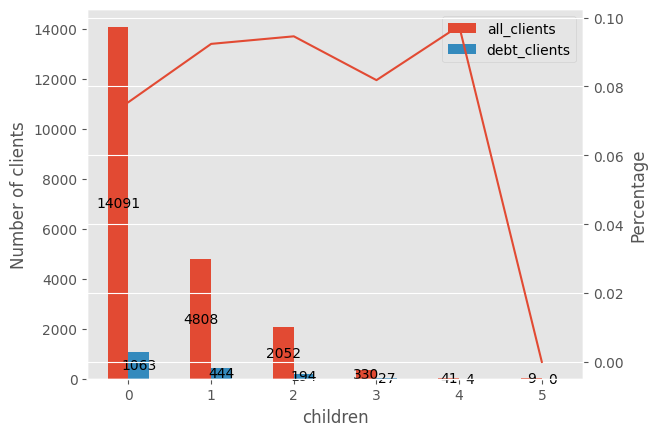

In [70]:
# build a graph
ax = data_grouped['debt'].plot(kind='bar')
plt.ylabel("Number of clients")

# numeric values for columns
for bar in ax.patches:
    height = round(bar.get_height())
    width = bar.get_width()
    x = bar.get_x()
    y = bar.get_y()
    label_text = height
    label_x = x + width / 2
    label_y = y + height / 2
    ax.text(label_x, label_y, label_text, ha='center',    
            va='center')

# add information about the probability of debt occurrence
data_grouped['debt_pct'].plot(secondary_y=True)

plt.ylabel("Percentage")

plt.show()

According to the graph, it seems that in quantitative terms the cohort of debtors "without children" is the most numerous, and in general, the more children, the less debtors. However, the probability of an increase in the number of debtors with an increase in the number of clients in a cohort is on average higher than in the current largest one. The exception is 5 children in the family, but there are only 9 clients, there is a possibility that the 10th one will become a debtor and the % will rise to the expected values.

In [71]:
# sort by number of debtors
data_grouped.sort_values(by=('debt','debt_clients'), ascending=False)

debt               debt_pct
         all_clients debt_clients          
children                                   
0              14091         1063  0.075438
1               4808          444  0.092346
2               2052          194  0.094542
3                330           27  0.081818
4                 41            4  0.097561
5                  9            0  0.000000

In isolation from other parameters, **number** of children is not indicative of the likelihood of debt. Families with 1, 2 and 4 children have approximately the same share of debt (9-10%). At the same time, families with 5 children have not yet appeared as debtors at all.

- It can be taken into account that families without children are the most numerous and have a smaller share of debts.
- Families with 5 children are very poorly represented in the sample

Let's try to make the same table by changing the categories to "with children" and "without children"

In [72]:
def categorize_children(children):
    """
    Returns a group by the value of the number of children in the family, using the rules:
    - 'no_kids', if no children (0);
    - 'have_kids', if children > 0 
    """

    try:
        if children == 0:
            return 'no_kids'
        elif children > 0:
            return 'have_kids'
    except:
        pass

# create a new dataframe with selected columns
data_children = data.loc[:,['children', 'debt']]
# get the categories in the new column using the categorize_children function
data_children['children_category'] = data_children['children'].apply(categorize_children)
data_children_drouped = data_children.groupby(['children_category']).agg({'debt':['count', 'sum',]})
# The `groupby()` and `agg()`` methods are useful when you need to apply a function to a column with grouped data or create a new column based on it
# Add a column with the share of debtors
data_children_drouped['debt_pct'] = data_children_drouped['debt']['sum'] / data_children_drouped['debt']['count']
# Rename aggregated columns for better readability
data_children_drouped = data_children_drouped.rename(columns={'count' : 'all_clients', 'sum':'debt_clients'})
data_children_drouped.sort_values(by='debt_pct', ascending=False)

debt               debt_pct
                  all_clients debt_clients          
children_category                                   
have_kids                7240          669  0.092403
no_kids                 14091         1063  0.075438

**Conclusion:**

The relationship between the **number** of children and the repayment of the loan on time does not have a pronounced character and pattern. It can be seen that the *number* of debtors follows the size of the cohorts, and they, in turn, correlate with the number of children in the family (the more children in the family, the fewer such families in the dataset)

In this part, you can divide clients into 2 categories - **"with children"** and **"without children"**. Then it can be argued that families with children (regardless of the number) are at risk of incurring debt more often. (0.5%-2%)

That is, it is now clear from the data that the growth of cohorts with children, with the exception of families with 5 children, is *more likely* to increase the number of debtors. But in quantitative terms, at the moment, the largest number of debtors is in the category of families without children.

#### 3.2 Is there a relationship between marital status and loan repayment on time?

##### Review

- The same `debt` is responsible for returning the loan on time.
- `family_status` and `family_status_id` columns are responsible for marital status

Let's see what values are there and how they can be used.

In [73]:
# unique family_status values
data['family_status'].unique()

array(['женат / замужем', 'гражданский брак', 'вдовец / вдова',
       'в разводе', 'Не женат / не замужем'], dtype=object)

In [74]:
# unique family_status_id values
data['family_status_id'].unique()

array([0, 1, 2, 3, 4])

We use marital status as categories and look at the shares of debtors depending on marital status

In [75]:
# Summary table for debtors
data_grouped_family = data.groupby(['family_status']).agg({'debt':['count', 'sum',]})
# Add a column with the share of debtors
data_grouped_family['debt_pct'] = data_grouped_family['debt']['sum'] / data_grouped_family['debt']['count']
# Rename aggregated columns for better readability
data_grouped_family = data_grouped_family.rename(columns={'count' : 'all_clients', 'sum':'debt_clients'})
data_grouped_family.sort_values(by='debt_pct', ascending=False)

debt               debt_pct
                      all_clients debt_clients          
family_status                                           
Не женат / не замужем        2796          273  0.097639
гражданский брак             4134          385  0.093130
женат / замужем             12261          927  0.075606
в разводе                    1189           84  0.070648
вдовец / вдова                951           63  0.066246

The spread is quite significant. What can be seen:
- Singles (single / unmarried) are more likely to become debtors
- However, those who are single in a situation after a divorce or loss of a spouse - on the contrary, become debtors much less often
- The largest cohort is married. They show the same % as the "no children" cohort from the previous analysis
- There is a noticeable difference between a civil marriage and an official one. Civil marriage by % of debtors is closer to the "single/single" cohort

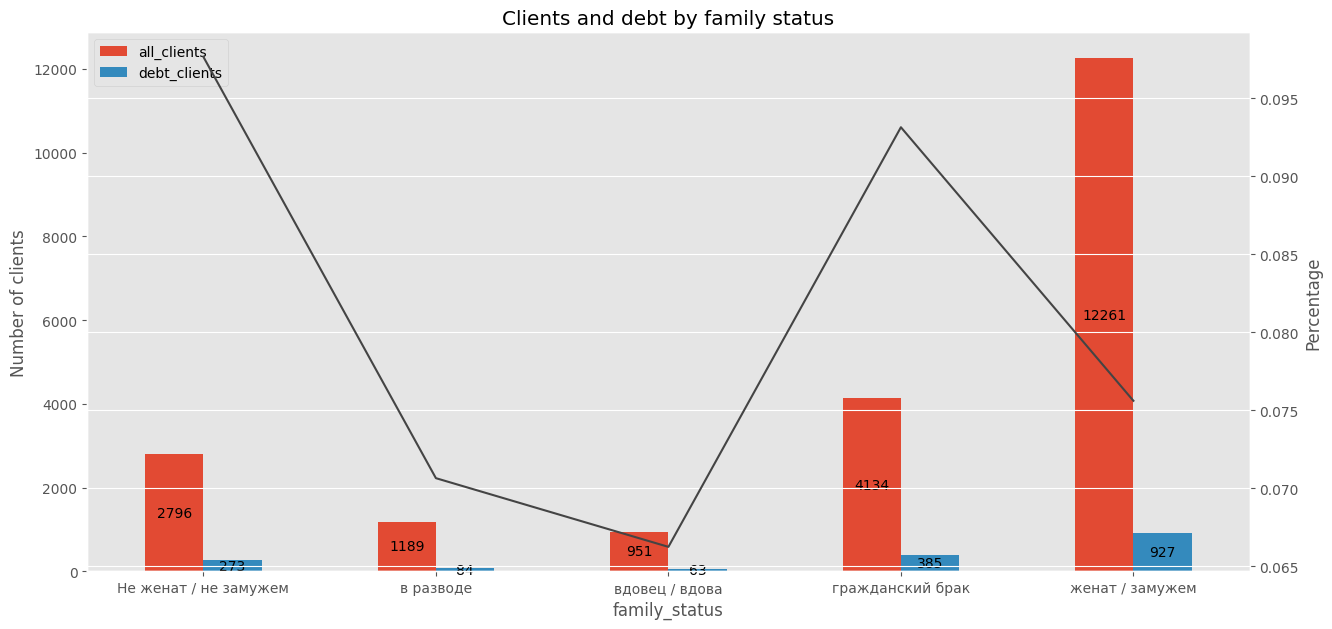

In [76]:
# build a graph
ax = data_grouped_family.plot(kind='bar', y='debt', figsize=(15, 7))
plt.ylabel("Number of clients")

for bar in ax.patches:
    height = round(bar.get_height())
    width = bar.get_width()
    x = bar.get_x()
    y = bar.get_y()
    label_text = height
    label_x = x + width / 2
    label_y = y + height / 2
    ax.text(label_x, label_y, label_text, ha='center',    
            va='center')

# add information about the probability of debt occurrence
data_grouped_family['debt_pct'].plot(secondary_y=True, color='#444444')

plt.title('Clients and debt by family status')
plt.ylabel("Percentage")

plt.show()

In [77]:
# create a pivot table
pivot_table = data.pivot_table(index='family_status', columns='children', values='debt', aggfunc='sum')
pivot_table

children,0,1,2,3,4,5
family_status,,,,,,
Не женат / не замужем,210.0,52.0,9.0,1.0,1.0,NaN
в разводе,55.0,21.0,7.0,1.0,0.0,NaN
вдовец / вдова,53.0,7.0,3.0,0.0,0.0,NaN
гражданский брак,229.0,118.0,30.0,8.0,0.0,0.0
женат / замужем,516.0,246.0,145.0,17.0,3.0,0.0


- the presence of children in the status of "widower / widow" has a significantly smaller impact than in other groups (compared to a similar number of "divorced", for example)
- "civil marriage" is strongly influenced by the presence of children (stronger than for a group of similar numbers "single / not married")
- An interesting category "Single / not married" (not divorced, not in a civil marriage), but with children.

In [78]:
# Summary table for debtors "Не женат / не замужем"
data_grouped_alone = data[data['family_status'] == 'Не женат / не замужем'].groupby(['children']).agg({'debt':['count', 'sum',]})
# The `groupby()` and `agg()`` methods are useful when you need to apply a function to a column with grouped data or create a new column based on it
# Add a column with the share of debtors
data_grouped_alone['debt_pct'] = data_grouped_alone['debt']['sum'] / data_grouped_alone['debt']['count']
# Rename aggregated columns for better readability
data_grouped_alone = data_grouped_alone.rename(columns={'count' : 'all_clients', 'sum':'debt_clients'})
# Sort the data by the probability of debt occurrence
data_grouped_alone.sort_values(by='debt_pct', ascending=False)

debt               debt_pct
         all_clients debt_clients          
children                                   
4                  2            1  0.500000
3                  8            1  0.125000
2                 75            9  0.120000
1                449           52  0.115813
0               2262          210  0.092838

The values are ~2% higher than in the item about the impact of the number of children, but they are higher both in the case of the absence of children and the presence of children. This can be neglected for now.

**Conclusion:**

- "single / unmarried" and "civil marriage" - groups with a high percentage of debtors. It is better not to grow these cohorts actively, with an increase in the number of clients in them, the number of debtors can be equal to the number of debtors of the largest group "married / married".
- "divorced" and "widower/widow" groups appear to be less prone to incurring debt

#### 3.3 Is there a relationship between income and loan repayment on time?

Previously, we identified categories by income level, in the analysis we will use them:
`total_income_category` column with categories

- 0–30000 — `'E'`;
- 30001–50000 — `'D'`;
- 50001–200000 — `'C'`;
- 200001–1000000 — `'B'`;
- 1000001 и выше — `'A'`.

In [79]:
# Summary table for debtors
data_grouped_income = data.groupby(['total_income_category']).agg({'debt':['count', 'sum',]})
# Add a column with the share of debtors
data_grouped_income['debt_pct'] = data_grouped_income['debt']['sum'] / data_grouped_income['debt']['count']
# Rename aggregated columns for better readability
data_grouped_income = data_grouped_income.rename(columns={'count' : 'all_clients', 'sum':'debt_clients'})
data_grouped_income.sort_values(by='debt_pct', ascending=False)

debt               debt_pct
                      all_clients debt_clients          
total_income_category                                   
E                              22            2  0.090909
C                           15921         1353  0.084982
A                              25            2  0.080000
B                            5014          354  0.070602
D                             349           21  0.060172

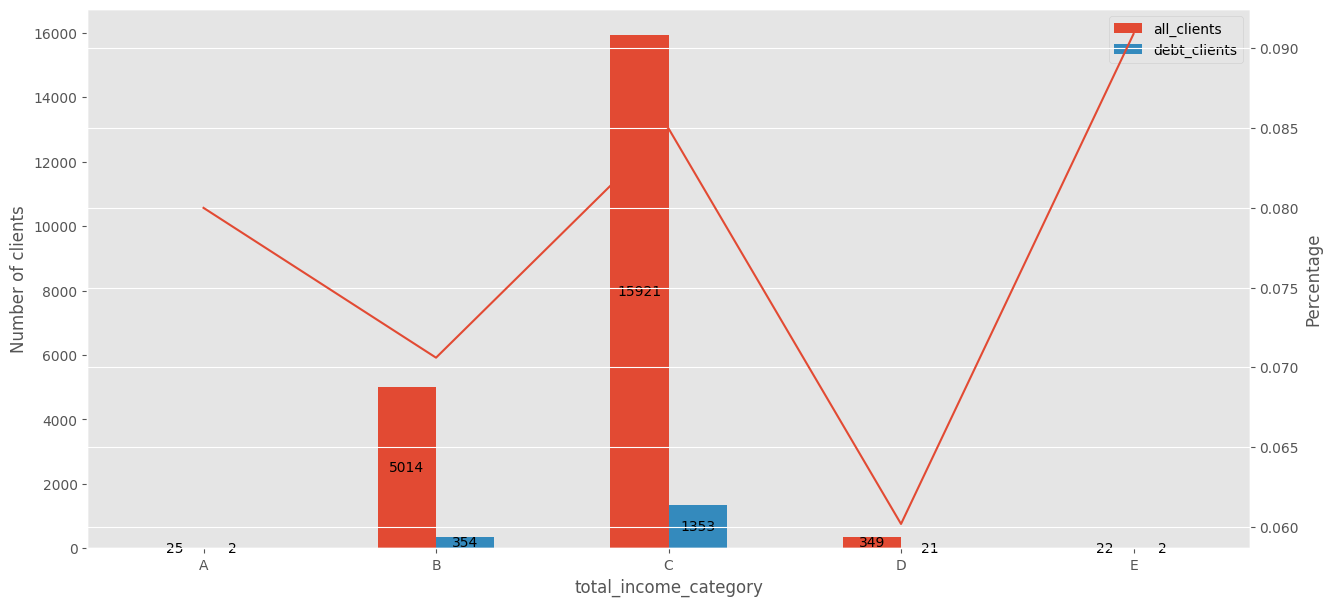

In [80]:
# build a graph
ax = data_grouped_income.plot(kind='bar', y='debt', figsize=(15, 7))
plt.ylabel("Number of clients")


for bar in ax.patches:
    height = round(bar.get_height())
    width = bar.get_width()
    x = bar.get_x()
    y = bar.get_y()
    label_text = height
    label_x = x + width / 2
    label_y = y + height / 2
    ax.text(label_x, label_y, label_text, ha='center',    
            va='center')

# add information about the probability of debt occurrence
data_grouped_income['debt_pct'].plot(secondary_y=True)

plt.ylabel("Percentage")

plt.show()

Let's check if there is an influence of the previous factors on this one.

In [81]:
# create a pivot table
pivot_table = data.pivot_table(index='total_income_category', columns='children', values='debt', aggfunc='sum')
pivot_table

children,0,1,2,3,4,5
total_income_category,,,,,,
A,1.0,1.0,0.0,0.0,NaN,NaN
B,220.0,88.0,41.0,4.0,1.0,0.0
C,828.0,351.0,149.0,22.0,3.0,0.0
D,12.0,4.0,4.0,1.0,NaN,0.0
E,2.0,0.0,0.0,NaN,NaN,NaN


In [82]:
# create a pivot table
pivot_table = data.pivot_table(index='total_income_category', columns='family_status', values='debt', aggfunc='sum')
pivot_table

family_status,Не женат / не замужем,в разводе,вдовец / вдова,гражданский брак,женат / замужем
total_income_category,,,,,
A,0.0,0.0,NaN,1.0,1.0
B,62.0,18.0,9.0,64.0,201.0
C,209.0,64.0,54.0,315.0,711.0
D,2.0,2.0,0.0,5.0,12.0
E,0.0,NaN,NaN,0.0,2.0


**Conclusion:**

The number of borrowers in all categories except B and C is incomparably smaller, therefore, to identify the dependence, it makes sense to compare only them.

- the most numerous category of "average income" at the same time has a high probability of loan default
- in the group with an income above the average - the indicator is better. This cohort should be grown, it will bring fewer debtors.

#### 3.4 How do different purposes of a loan affect its repayment on time?

Earlier, we highlighted the `purpose_category` column, which included the categories:

- ``car operations'`,
- ``real estate transactions'`,
- ``conducting a wedding'`,
- ``getting an education'`.

We will use it to analyze

In [83]:
# Summary table for debtors
data_grouped_purpose = data.groupby(['purpose_category']).agg({'debt':['count', 'sum',]})
# Add a column with the share of debtors
data_grouped_purpose['debt_pct'] = data_grouped_purpose['debt']['sum'] / data_grouped_purpose['debt']['count']
# Rename aggregated columns for better readability
data_grouped_purpose = data_grouped_purpose.rename(columns={'count' : 'all_clients', 'sum':'debt_clients'})
data_grouped_purpose.sort_values(by='debt_pct', ascending=False)

debt               debt_pct
                         all_clients debt_clients          
purpose_category                                           
операции с автомобилем          4279          400  0.093480
получение образования           3988          369  0.092528
проведение свадьбы              2313          183  0.079118
операции с недвижимостью       10751          780  0.072551

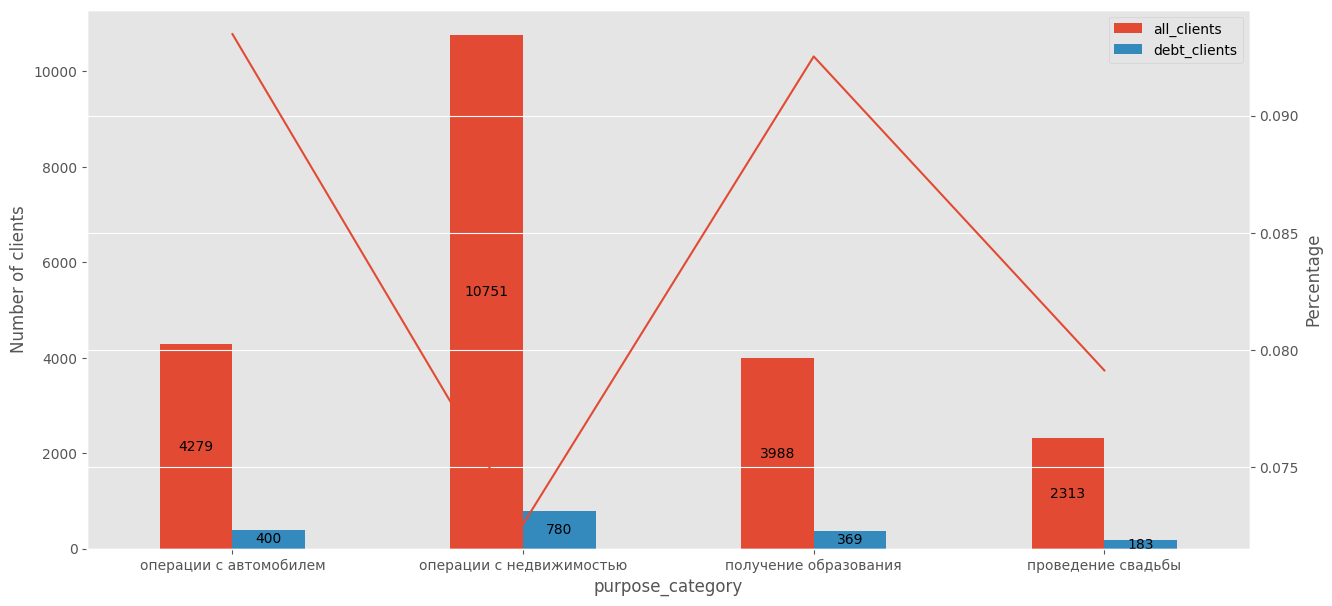

In [84]:
ax = data_grouped_purpose.plot(kind='bar', y='debt', figsize=(15, 7))
plt.ylabel("Number of clients")


for bar in ax.patches:
    height = round(bar.get_height())
    width = bar.get_width()
    x = bar.get_x()
    y = bar.get_y()
    label_text = height
    label_x = x + width / 2
    label_y = y + height / 2
    ax.text(label_x, label_y, label_text, ha='center',    
            va='center')


data_grouped_purpose['debt_pct'].plot(secondary_y=True)

plt.ylabel("Percentage")

plt.show()

Let's check if there is an influence of the previous factors on this

In [85]:
# create pivot table
pivot_table = data.pivot_table(index='purpose_category', columns='children', values='debt', aggfunc='sum')
pivot_table

children,0,1,2,3,4,5
purpose_category,,,,,,
операции с автомобилем,243,103,48,5,1,0
операции с недвижимостью,476,200,88,13,3,0
получение образования,229,90,46,4,0,0
проведение свадьбы,115,51,12,5,0,0


In [86]:
# create pivot table
pivot_table = data.pivot_table(index='purpose_category', columns='family_status', values='debt', aggfunc='sum')
pivot_table

family_status,Не женат / не замужем,в разводе,вдовец / вдова,гражданский брак,женат / замужем
purpose_category,,,,,
операции с автомобилем,82.0,21.0,20.0,51.0,226.0
операции с недвижимостью,129.0,46.0,28.0,91.0,486.0
получение образования,62.0,17.0,15.0,60.0,215.0
проведение свадьбы,NaN,NaN,NaN,183.0,NaN


In [87]:
# create pivot table
pivot_table = data.pivot_table(index='purpose_category', columns='total_income_category', values='debt', aggfunc='sum')
pivot_table

total_income_category,A,B,C,D,E
purpose_category,,,,,
операции с автомобилем,0,85,305,10,0
операции с недвижимостью,1,172,599,6,2
получение образования,1,69,297,2,0
проведение свадьбы,0,28,152,3,0


**Conclusion:**

- the largest cohort of real estate transactions, although it has the largest number of debtors, it also has the lowest risk of their occurrence
- high risk of debt - in transactions with a car and education - together these two groups have almost the same number of debtors as the most numerous, and there are fewer clients in them.

#### 3.5 Possible reasons for missing values in the source data.

- maybe `days_employed` and `total_income` are requested and loaded from an external system (eg tax?). For some reason, there may be errors in obtaining this data - the service did not respond or the data was not there
- if the data is entered manually - it may be a human factor
- if the data is entered by the clients themselves, they can skip this data due to ignorance (the rest of the data is simpler)
- there may have been errors in the calculation of the total (total) - there may have been gaps in the data that were not processed

#### Why filling gaps with the median is the best solution for scale variables.

- If data are missing completely randomly, then it is fair to assume that the missing values are likely to be very close to the value of the mean or median of the distribution, since they represent the most common/averaged observation. In addition, we may have data for similar categories - this biases the sample to a lesser extent.
- Sampling bias is not very noticeable if no more than 5% of the variable contains missing data. (in our case, 2174 out of 21525 is 10%, but this is also tolerable)
- If the variable is skewed, the mean is biased by values on one side of the distribution. Therefore, the median is the best representation of most of the values of the variable. (in our data, `total_income` is biased towards higher income)

### Step 4: general conclusion.

**Data**

For the analysis, unloading of statistics on the solvency of customers was used. In the process of processing the dataset, several shortcomings were discovered that had to be processed.

- There are missing values in two columns. These are `days_employed` (work experience) and `total_income` - stores income data. The gaps in these columns were filled with the median value for each type from the `income_type` column.
Also, negative values were found in the `days_employed` column and values are not in days, but in hours. We recommend that you pay attention to the completion and format of data that fall into these columns, as incorrect and missing values \u200b\u200bmay distort the results.

- There are two anomalous values in the `children` column - -1 and 20. Rows with these values were not taken into account in this study. In the future, we recommend that you study the reasons for the appearance of these values in the upload (how are they filled in - by clients or automatically from other systems?)

- The `education` column has the same values, but written differently: using uppercase and lowercase letters. For processing, they brought them to lower case.

For convenience, the study combined part of the data into categories.
- *by income level*:
   - 0–30000 - 'E';
   - 30001–50000 - 'D';
   - 50001–200000 - 'C';
   - 200001–1000000 - 'B';
   - 1000001 and above - 'A'.

- *for the purpose of taking a loan*:
   - 'car operations',
   - 'real estate transactions',
   - 'holding a wedding',
   - 'getting an education'.

**Research results**

We looked at four parameters that can affect the return of a loan on time. Found out the following:
1. The presence of children negatively affects the repayment of the loan on time, however, the number of children is of relatively little importance.
2. "not married / not married" and "civil marriage" - groups with a high percentage of debtors.
3. Loan repayment on time is better provided by clients with "above average" incomes (200,001–1,000,000)
4. Wedding and real estate transactions - more likely to repay the loan on time than car transactions and education purposes